In [83]:
import csv
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [84]:
# Path to the dataset and mapping files
dataset_path = "./data/data.csv"
mapping = "./data/mapping.csv"

In [85]:
# Print out the column name
with open(dataset_path) as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)
    print(headers)

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [86]:
# print out the first 5 rows of the dataset
with open(dataset_path) as csv_file:
    csv_reader = csv.reader(csv_file)
    for i, row in enumerate(csv_reader):
        if i >= 5:
            break
        print(row)
    print("\n\n")




['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
['2278392', '8222157', 'Caucasian', 'Female', '[0-10)', '?', '6', '25', '1', '1', '?', 'Pediatrics-Endocrinology', '41', '0', '1', '0', '0', '0', '250.83', '?', '?', '1', 'None', 'No

DATA VIZUALISATION

In [87]:
# load dataset
dataset = pd.read_csv(dataset_path)
print(dataset.head(),dataset.count())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

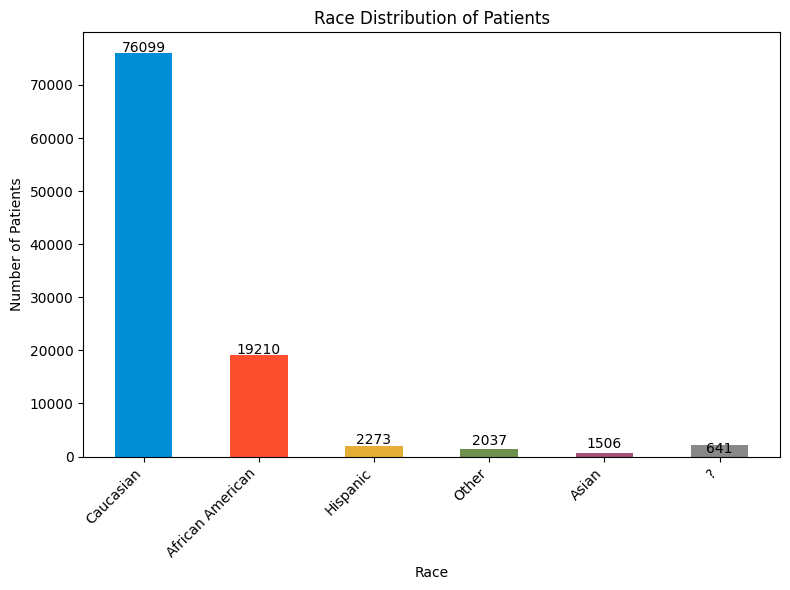

In [88]:
race_counts = dataset['race'].value_counts()
caucasian_count = race_counts['Caucasian']
african_American_count = race_counts['AfricanAmerican']
hispanic_count = race_counts['Hispanic']
other_count = race_counts['Other']
asian_count = race_counts['Asian']
notKnow_count = race_counts['?']

# Create a bar chart of the race distribution
labels = ['Caucasian', 'African American', 'Hispanic', 'Other', 'Asian', '?']
sizes = [caucasian_count, african_American_count, hispanic_count, other_count, asian_count, notKnow_count]
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', '#a64d79', '#888888']

plt.figure(figsize=(8,6))
plt.bar(labels, sizes, color=colors, width=0.5)
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.title('Race Distribution of Patients')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(race_counts):
    plt.text(i, v + 80, str(v), ha='center')
plt.tight_layout()
plt.show()








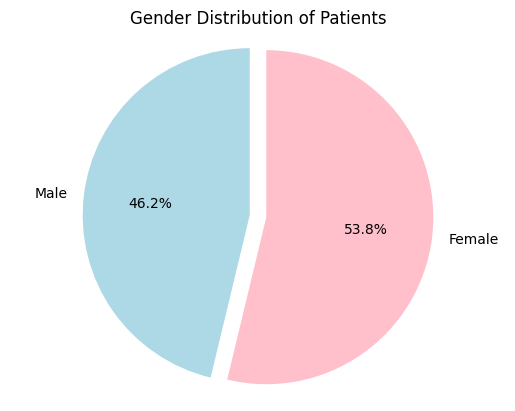

In [89]:
# Calculate the number and percentage of male and female patients
gender_counts = dataset['gender'].value_counts()
male_count = gender_counts['Male']
female_count = gender_counts['Female']
total_count = male_count + female_count
male_percent = male_count / total_count * 100
female_percent = female_count / total_count * 100

# Create a pie chart of the gender distribution
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['#ADD8E6', '#FFC0CB']
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Gender Distribution of Patients')
plt.show()

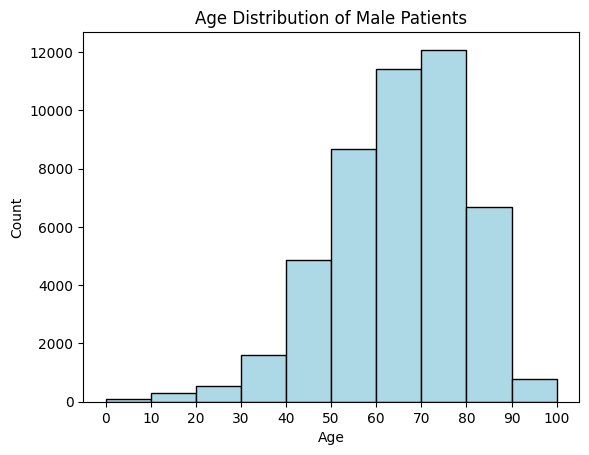

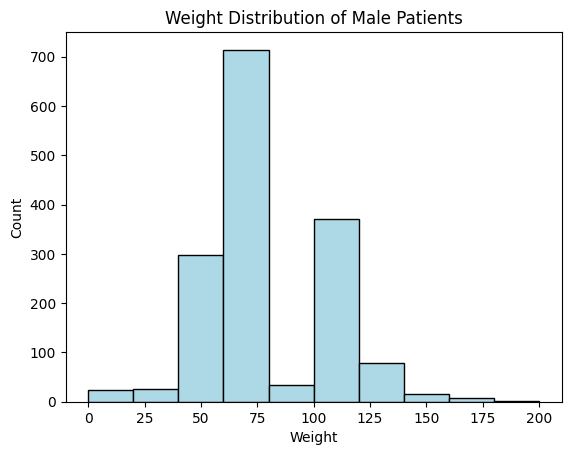

In [90]:
# Create a histogram of males patient

# Filter the dataset to include only male patients
male_data = dataset.loc[dataset['gender'] == 'Male']

# Extract the age range from the age column and convert to integer
male_data = male_data.copy()  # Ensure it's a separate copy
male_data['age_range'] = male_data['age'].apply(lambda x: int(x.split('-')[0][1:]))

# Create a histogram of patient ages for male patients
plt.hist(male_data['age_range'], color='#ADD8E6', bins=range(0, 110, 10), edgecolor='black')
plt.xticks(range(0, 110, 10))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Male Patients')
plt.show()


# Replace weight range notation with average weight
dataset['weight'] = dataset['weight'].replace('[\?]', np.nan, regex=True)  # replace '?' with NaN
dataset['weight'] = dataset['weight'].replace('[\(\[](.*)[\)\]]', '\\1', regex=True)  # extract numerical values
dataset['weight'] = dataset['weight'].replace('\>', '', regex=True)  # remove '>' symbol
dataset['weight'] = dataset['weight'].replace('\<', '', regex=True)  # remove '<' symbol
dataset['weight'] = dataset['weight'].apply(lambda x: float(x.split('-')[0]) if '-' in str(x) else x)  # handle weight ranges
dataset['weight'] = dataset['weight'].astype(float)

# Calculate weight average for each patient
weight_avg = dataset.groupby('patient_nbr')['weight'].mean().reset_index(name='weight_avg')

# Merge weight_avg with male_data
male_data_weight = pd.merge(male_data, weight_avg, on='patient_nbr')

# Create a histogram of the weight distribution for male patients
plt.hist(male_data_weight['weight_avg'].dropna(), color='#ADD8E6', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight Distribution of Male Patients')
plt.show()


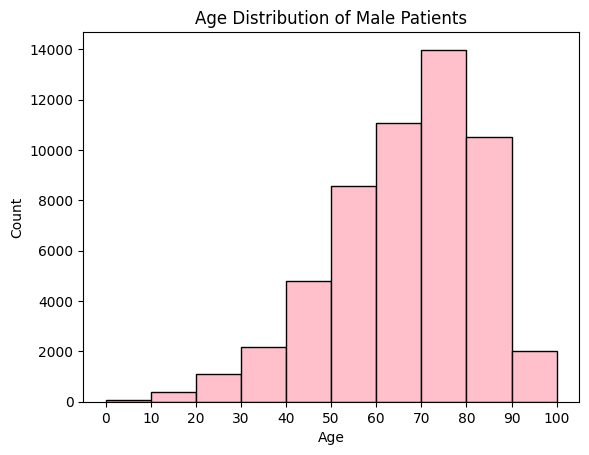

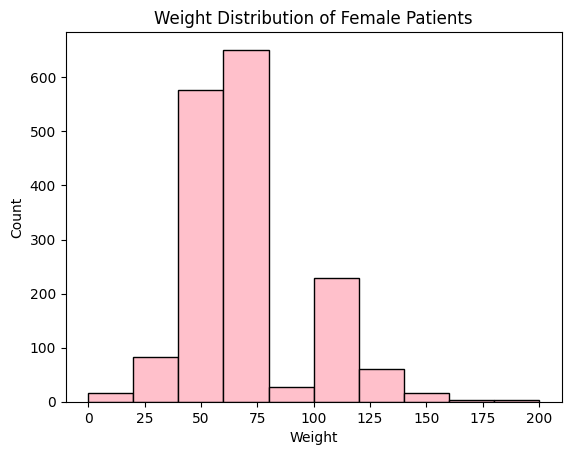

In [91]:
# Create a histogram of feamles patient

# Filter the dataset to include only female patients
female_data = dataset.loc[dataset['gender'] == 'Female']

# Extract the age range from the age column and convert to integer
female_data = female_data.copy()  # Ensure it's a separate copy
female_data['age_range'] = female_data['age'].apply(lambda x: int(x.split('-')[0][1:]))

# Create a histogram of patient ages for male patients
plt.hist(female_data['age_range'], color='#FFC0CB', bins=range(0, 110, 10), edgecolor='black')
plt.xticks(range(0, 110, 10))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Male Patients')
plt.show()


# Replace weight range notation with average weight
dataset['weight'] = dataset['weight'].replace('[\?]', np.nan, regex=True)  # replace '?' with NaN
dataset['weight'] = dataset['weight'].replace('[\(\[](.*)[\)\]]', '\\1', regex=True)  # extract numerical values
dataset['weight'] = dataset['weight'].replace('\>', '', regex=True)  # remove '>' symbol
dataset['weight'] = dataset['weight'].replace('\<', '', regex=True)  # remove '<' symbol
dataset['weight'] = dataset['weight'].apply(lambda x: float(x.split('-')[0]) if '-' in str(x) else x)  # handle weight ranges
dataset['weight'] = dataset['weight'].astype(float)

# Calculate weight average for each patient
weight_avg = dataset.groupby('patient_nbr')['weight'].mean().reset_index(name='weight_avg')

# Merge weight_avg with male_data
female_data_weight = pd.merge(female_data, weight_avg, on='patient_nbr')

# Create a histogram of the weight distribution for male patients
plt.hist(female_data_weight['weight_avg'].dropna(), color='#FFC0CB', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Weight Distribution of Female Patients')
plt.show()


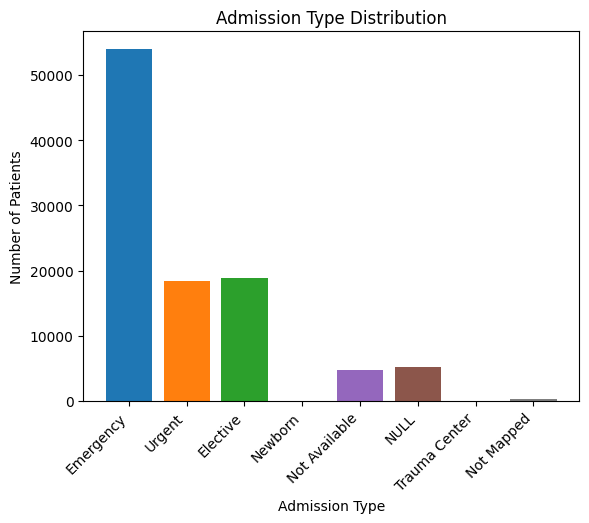



Exact number:
admission_type_id
Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: count, dtype: int64


In [37]:
# Count the number of patients in each admission type
admission_counts = dataset.groupby('admission_type_id')['gender'].count()

# Create a bar chart
plt.bar(admission_counts.index, admission_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.xticks(admission_counts.index, ['Emergency', 'Urgent', 'Elective', 'Newborn', 'Not Available', 'NULL', 'Trauma Center', 'Not Mapped'], rotation=45, ha='right')
plt.xlabel('Admission Type')
plt.ylabel('Number of Patients')
plt.title('Admission Type Distribution')
plt.show()

print("\n\nExact number:")
# Define the dictionary mapping admission type id to its meaning
admission_type_dict = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}

# Replace admission type id with their meanings
dataset['admission_type_id'] = dataset['admission_type_id'].replace(admission_type_dict)

# Count the number of patients per admission type and print it out
patient_counts = dataset['admission_type_id'].value_counts()
print(patient_counts)





discharge_disposition_id
Discharged to home                                                                                           60234
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to home with home health service                                                      12902
NULL                                                                                                          3691
Discharged/transferred to another short term hospital                                                         2128
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1993
Expired                                                                                                       1642
Discharged/transferred to another type of inpatient care institution                                          1184
Not Mapped                                             

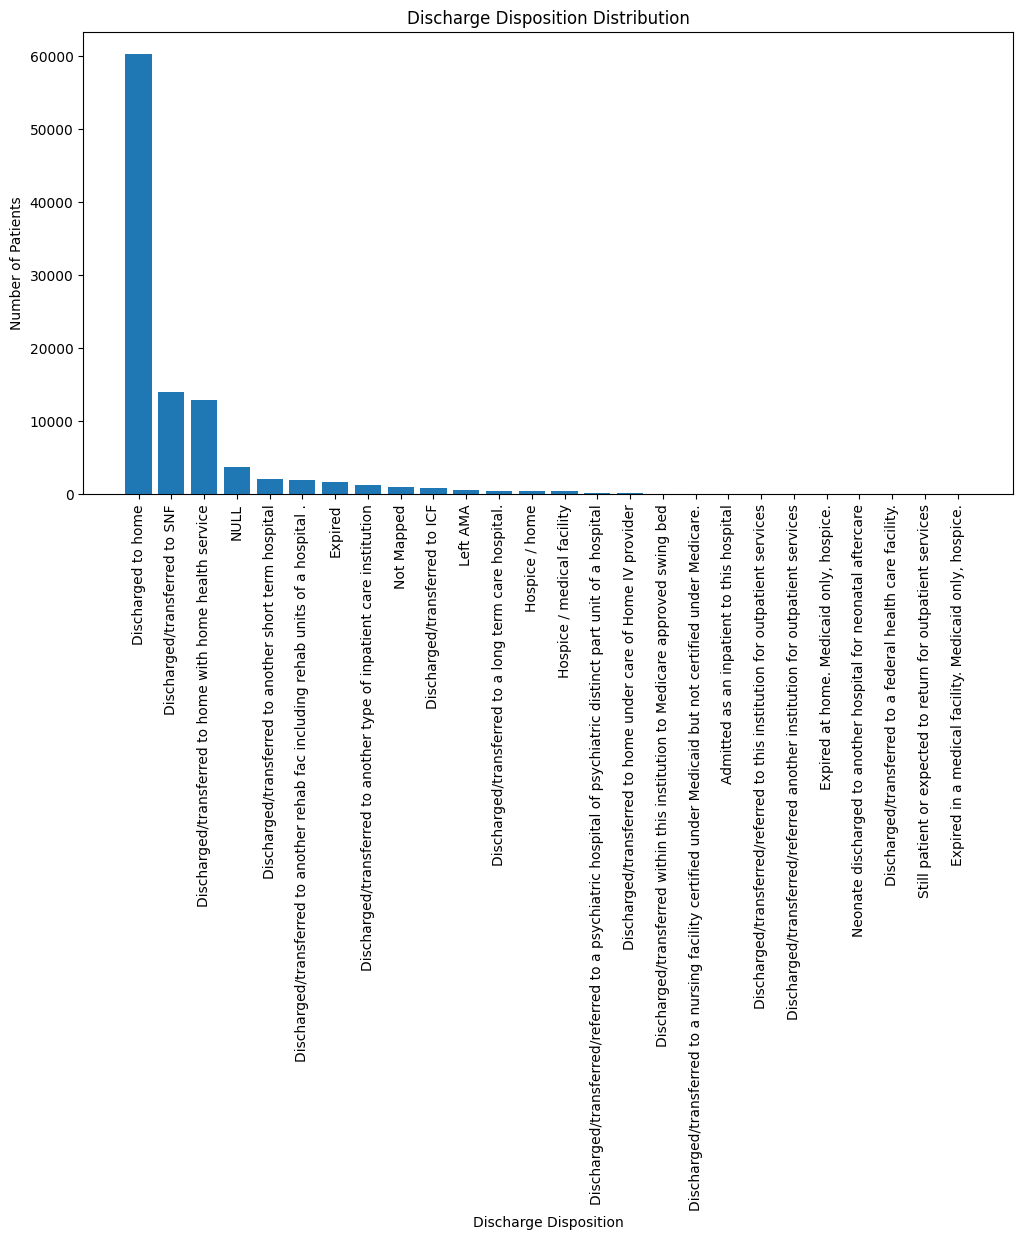

In [38]:
# Define the dictionary mapping discharge disposition id to its meaning
discharge_disposition_dict = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of inpatient care institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: 'NULL',
    19: 'Expired at home. Medicaid only, hospice.',
    20: 'Expired in a medical facility. Medicaid only, hospice.',
    21: 'Expired, place unknown. Medicaid only, hospice.',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital .',
    23: 'Discharged/transferred to a long term care hospital.',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
    25: 'Not Mapped',
    26: 'Unknown/Invalid',
    27: 'Discharged/transferred to a federal health care facility.',
    28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29: 'Discharged/transferred to a Critical Access Hospital (CAH).',
    30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'
}

# Replace discharge disposition id with their meanings
dataset['discharge_disposition_id'] = dataset['discharge_disposition_id'].replace(discharge_disposition_dict)

# Count the number of patients per discharge disposition and print it out
patient_counts = dataset['discharge_disposition_id'].value_counts()
print(patient_counts)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(patient_counts.index, patient_counts.values, color='#1f77b4')
plt.xticks(rotation=90)
plt.xlabel('Discharge Disposition')
plt.ylabel('Number of Patients')
plt.title('Discharge Disposition Distribution')
plt.show()




Exact number:
admission_source_id
Emergency Room                                               57494
Physician Referral                                           29565
NULL                                                          6781
Transfer from hospital                                        3187
Transfer from another healthcare facility                     2264
Clinic Referral                                               1104
Transfer from SNF                                              855
HMO Referral                                                   187
Not Mapped                                                     161
Not Available                                                  125
Court/Law Enforcement                                           16
Transfer from hospital inpt/same fac reslt in a sep claim       12
Transfer from critical access hospital                           8
Extramural Birth                                                 2
Normal Delivery           

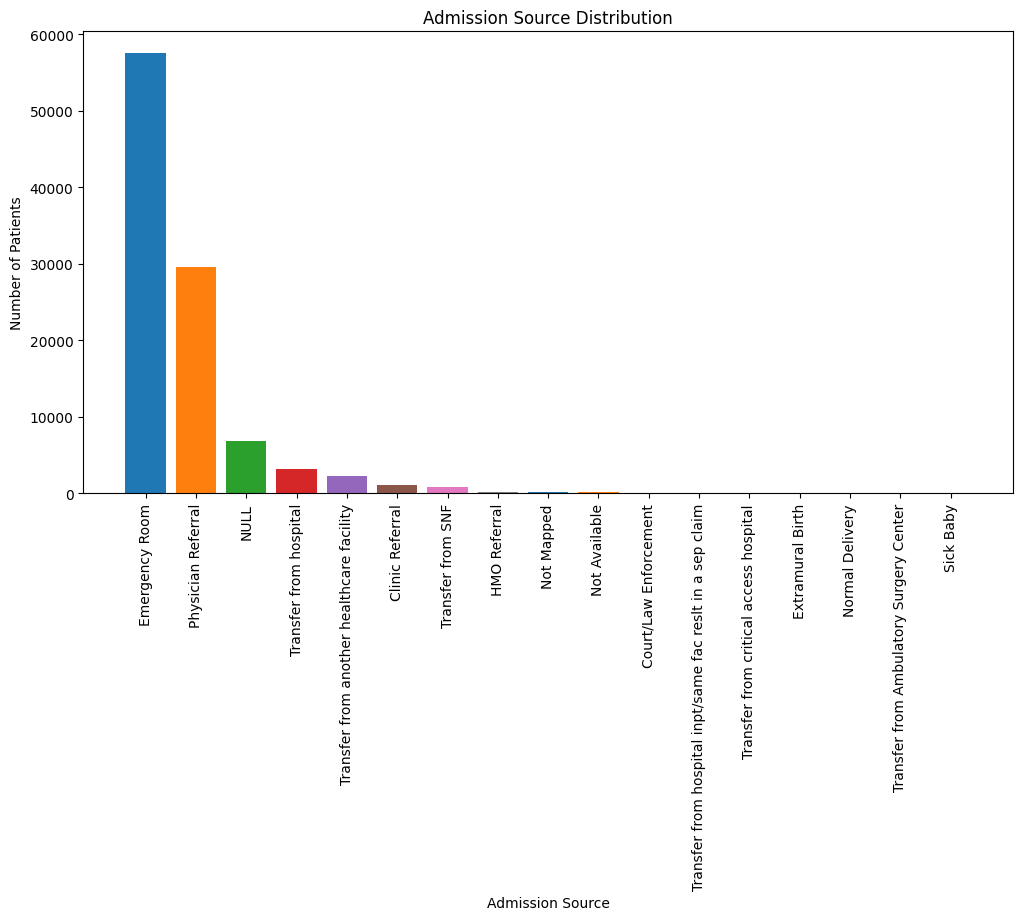

In [39]:
print("\n\nExact number:")
# Define the dictionary mapping admission source id to its meaning
admission_source_dict = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from hospital',
    5: 'Transfer from SNF',
    6: 'Transfer from another healthcare facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critical access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: 'NULL',
    18: 'Transfer from another home health agency',
    19: 'Readmission to same home health agency',
    20: 'Not Mapped',
    21: 'Unknown/Invalid',
    22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}

# Replace admission source id with their meanings
dataset['admission_source_id'] = dataset['admission_source_id'].replace(admission_source_dict)

# Count the number of patients per admission source and print it out
patient_counts = dataset['admission_source_id'].value_counts()
print(patient_counts)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(patient_counts.index, patient_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.xticks(rotation=90)
plt.xlabel('Admission Source')
plt.ylabel('Number of Patients')
plt.title('Admission Source Distribution')
plt.show()




DATA PRE-PROCESSING

In [40]:
# load dataset
dataset = pd.read_csv(dataset_path)

i = 1000000
while i>10000:
  # count "?" in each column
  counts = (dataset == '?').sum()

  # select column with the highest count
  column_with_most_missing_values = counts.idxmax()

  # print the result
  print(f"The column with the most missing values is {column_with_most_missing_values} with {counts[column_with_most_missing_values]} missing values.")
  dataset = dataset.drop(columns=column_with_most_missing_values)
  i = counts[column_with_most_missing_values]


The column with the most missing values is weight with 98569 missing values.
The column with the most missing values is medical_specialty with 49949 missing values.
The column with the most missing values is payer_code with 40256 missing values.
The column with the most missing values is race with 2273 missing values.


In [41]:
# load dataset
dataset = pd.read_csv(dataset_path)

# Remove the specified columns
columns_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
dataset = dataset.drop(columns=columns_to_drop)
num_rows = dataset.shape[0]
print("Number of rows:", num_rows)

dataset = dataset.replace('?', np.nan)  # Replace '?' with NaN values
dataset['diag_1'] = pd.to_numeric(dataset['diag_1'], errors='coerce') # replace non numerical value with NaN values
dataset['diag_2'] = pd.to_numeric(dataset['diag_2'], errors='coerce') # replace non numerical value with NaN values
dataset['diag_3'] = pd.to_numeric(dataset['diag_3'], errors='coerce') # replace non numerical value with NaN values
dataset = dataset.dropna()  # Drop rows with NaN values
num_rows = dataset.shape[0]
print("Number of rows:", num_rows)

# Keep only the rows where the value for 'admission_type_id' is 1, 2, or 3
dataset = dataset[dataset['admission_type_id'].isin([1, 2, 3])]
# Keep only the rows where the value for 'discharge_disposition_id' is 1, 3, or 7
dataset = dataset[dataset['discharge_disposition_id'].isin([1, 3, 6])]
# Keep only the rows where the value for 'admission_source_id' is 1 or 7
dataset = dataset[dataset['admission_source_id'].isin([1,7])]

dataset = dataset.drop(['admission_type_id', 'discharge_disposition_id','admission_source_id'], axis=1)

num_rows = dataset.shape[0]
print("(after selection) Number of rows:", num_rows)

dataset['num_lab_procedures'] = dataset['num_lab_procedures'].astype(float)
dataset['diag_1'] = dataset['diag_1'].astype(float)
dataset['diag_2'] = dataset['diag_2'].astype(float)
dataset['diag_3'] = dataset['diag_3'].astype(float)
dataset['number_diagnoses'] = dataset['number_diagnoses'].astype(float)
mapping = {'No': 0, 'Yes': 1}
dataset['diabetesMed'] = dataset['diabetesMed'].replace(mapping).astype(float)

# One-hot encode string columns
dataset_one_hot_encoding = pd.get_dummies(dataset, columns=['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted'])
num_rows = dataset_one_hot_encoding.shape[0]
num_cols = dataset_one_hot_encoding.shape[1]
print("Number of rows/cols:", num_rows,"x",num_cols)

# Define the target variable
target = 'diabetesMed'

# Compute the correlation matrix
corr_matrix = dataset_one_hot_encoding.corr(method='spearman')

# Select the top k features with the highest correlation coefficients with the target variable
k = 30
top_features = corr_matrix[target].abs().nlargest(k).index

# Assuming top_features is the list of columns you want to keep
dataset_corr_one_hot_encoding = dataset_one_hot_encoding.loc[:, top_features]
num_rows = dataset_corr_one_hot_encoding.shape[0]
print("Number of rows:", num_rows)
print(dataset_corr_one_hot_encoding.head())

Number of rows: 101766
Number of rows: 276
(after selection) Number of rows: 52
Number of rows/cols: 52 x 67
Number of rows: 52
       diabetesMed  change_Ch  change_No  metformin_No  metformin_Steady  \
50336          0.0      False       True          True             False   
54341          1.0       True      False          True             False   
55119          1.0       True      False         False              True   
56067          0.0      False       True          True             False   
57290          0.0      False       True          True             False   

       glipizide_No  glipizide_Steady  insulin_No  gender_Female  gender_Male  \
50336          True             False        True           True        False   
54341          True             False       False          False         True   
55119         False              True       False          False         True   
56067          True             False        True           True        False   
57290     

C:\Users\Elliot\AppData\Local\Temp\ipykernel_12204\1702548489.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['diabetesMed'] = dataset['diabetesMed'].replace(mapping).astype(float)


In [42]:
# Create a MinMaxScaler object
scaler_corr_one_hot_encoding = MinMaxScaler()

# Normalize all columns in the dataframe
df_normalized_corr_one_hot_encoding = pd.DataFrame(scaler_corr_one_hot_encoding.fit_transform(dataset_corr_one_hot_encoding), columns=dataset_corr_one_hot_encoding.columns)

(Dataset of just removing the ?)


In [43]:
# load dataset
dataset = pd.read_csv(dataset_path)

# Remove the specified columns
columns_to_drop = ['encounter_id', 'patient_nbr','weight','payer_code','medical_specialty',]
dataset = dataset.drop(columns=columns_to_drop)
num_rows = dataset.shape[0]
print("Number of rows:", num_rows)

dataset = dataset.replace('?', np.nan)  # Replace '?' with NaN values
dataset['diag_1'] = pd.to_numeric(dataset['diag_1'], errors='coerce') # replace non numerical value with NaN values
dataset['diag_2'] = pd.to_numeric(dataset['diag_2'], errors='coerce') # replace non numerical value with NaN values
dataset['diag_3'] = pd.to_numeric(dataset['diag_3'], errors='coerce') # replace non numerical value with NaN values
dataset = dataset.dropna()  # Drop rows with NaN values
num_rows = dataset.shape[0]
print("Number of rows:", num_rows)

dataset.loc[:, ['diag_1', 'diag_2', 'diag_3']] = dataset.loc[:, ['diag_1', 'diag_2', 'diag_3']].astype(float)
mapping = {'No': 0, 'Yes': 1}
dataset['diabetesMed'] = dataset['diabetesMed'].replace(mapping).astype(float)

# One-hot encode string columns
dataset_full_one_hot_encoding = pd.get_dummies(dataset, columns=['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted'])
num_rows = dataset_one_hot_encoding.shape[0]
num_cols = dataset_one_hot_encoding.shape[1]
print("Number of rows/cols:", num_rows,"x",num_cols)

# Define the target variable
target = 'diabetesMed'

# Compute the correlation matrix
corr_matrix = dataset_full_one_hot_encoding.corr()

# Select the top k features with the highest correlation coefficients with the target variable
k = 30
top_features = corr_matrix[target].abs().nlargest(k).index

# Assuming top_features is the list of columns you want to keep
dataset_full_corr_one_hot_encoding = dataset_full_one_hot_encoding.loc[:, top_features]
num_rows = dataset_full_corr_one_hot_encoding.shape[0]
print("Number of rows:", num_rows)
print(dataset_full_corr_one_hot_encoding.head())

Number of rows: 101766
Number of rows: 276
Number of rows/cols: 52 x 67
Number of rows: 276
     diabetesMed  insulin_No  change_No  change_Ch  insulin_Steady  \
162          0.0        True       True      False           False   
460          1.0       False      False       True           False   
593          1.0       False       True      False            True   
771          0.0        True       True      False           False   
823          1.0        True       True      False           False   

     glipizide_No  metformin_No  metformin_Steady  glipizide_Steady  \
162          True          True             False             False   
460         False          True             False             False   
593          True          True             False             False   
771          True          True             False             False   
823         False          True             False              True   

     insulin_Down  ...  rosiglitazone_No  rosiglitazone_Stea

C:\Users\Elliot\AppData\Local\Temp\ipykernel_12204\3443507285.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['diabetesMed'] = dataset['diabetesMed'].replace(mapping).astype(float)


In [44]:
# Create a MinMaxScaler object
scaler_full_corr_one_hot_encoding = MinMaxScaler()

# Normalize all columns in the dataframe
df_normalized_full_corr_one_hot_encoding = pd.DataFrame(scaler_corr_one_hot_encoding.fit_transform(dataset_full_corr_one_hot_encoding), columns=dataset_full_corr_one_hot_encoding.columns)

TRAINING



In [45]:
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(Logistic Regression)

In [46]:
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Create a Logistic Regression object
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", conf_matrix)
# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9090909090909091
Precision: 1.0
Recall: 0.8888888888888888
F1 Score: 0.9411764705882353
Confusion Matrix: [[2 0]
 [1 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.89      0.94         9

    accuracy                           0.91        11
   macro avg       0.83      0.94      0.87        11
weighted avg       0.94      0.91      0.92        11



(Decision Tree)

In [47]:
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Create a Decision Tree object
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", conf_matrix)
# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: [[6 0]
 [0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



(Random Forests)

In [48]:
# Create a Random Forests object with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
[[6 0]
 [0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



(SVM)

In [49]:
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Create an SVM object
svm = SVC(kernel='linear')

# Train the model on the training data
svm.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
[[6 0]
 [0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



(Gradient Boosting Machines)

In [50]:
# Create a Gradient Boosting object
gbm = GradientBoostingClassifier()

# Train the model on the training data
gbm.fit(X_train, y_train)

# Predict on the testing data
y_pred = gbm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
[[6 0]
 [0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



(DEEP LEARNING)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
model.add(Dense(1, activation='linear'))
model.compile(loss=Huber(), optimizer=Adam(learning_rate= 0.001), metrics=['accuracy']) # binary crossentropy


c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step - accuracy: 0.3902 - loss: 0.4395
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3902 - loss: 0.3849
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3902 - loss: 0.3401
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4390 - loss: 0.2569
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4390 - loss: 0.2453
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4390 - loss: 0.2425
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5366 - loss: 0.1753
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3902 - loss: 0.2178
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6098 - loss: 0.1840
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4146 - loss: 0.1880


In [53]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=1)
predictions = model.predict(X_test)
predicted_labels = np.round(predictions)
accuracy = accuracy_score(y_test, predicted_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("\n")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7273 - loss: 0.1091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Test Loss: [0.1090853288769722, 0.7272727489471436]
Test Accuracy: 0.7272727272727273




Epochs_param optimization

c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inst

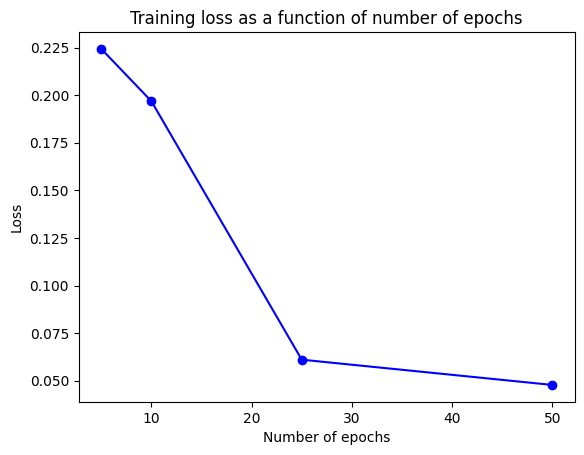

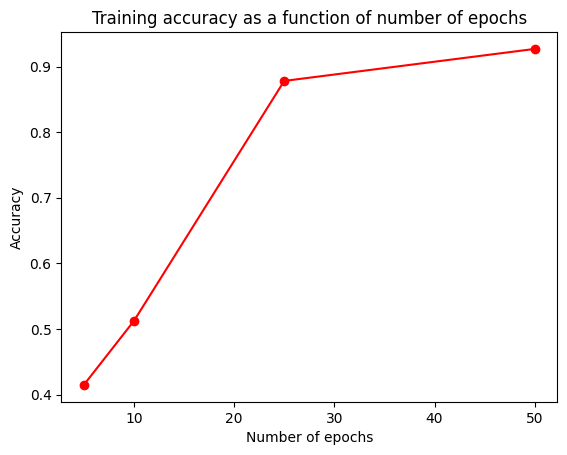

In [54]:
# Define input and output variables for training
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_epochs):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=128, verbose=0)
    return history

# Train a series of models with varying numbers of epochs
n_epochs_list = [5, 10, 25, 50]
loss_list = []
accuracy_list = []
for n_epochs in n_epochs_list:
    history = train_model(n_epochs)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])


# Plot the loss as a function of number of epochs
plt.plot(n_epochs_list, loss_list, 'bo-')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss as a function of number of epochs')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_epochs_list, accuracy_list, 'ro-')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of epochs')


plt.show()

Batch size optimisation

c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inst

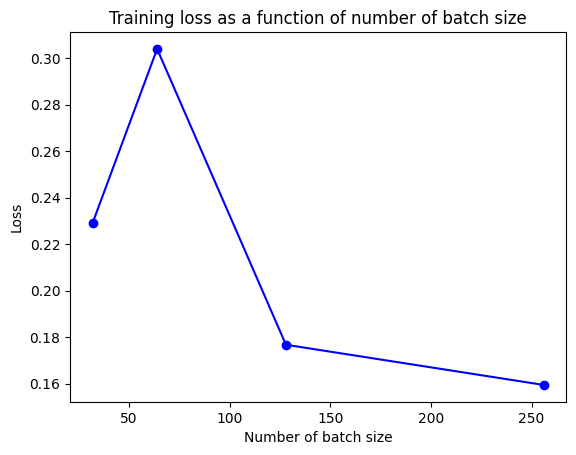

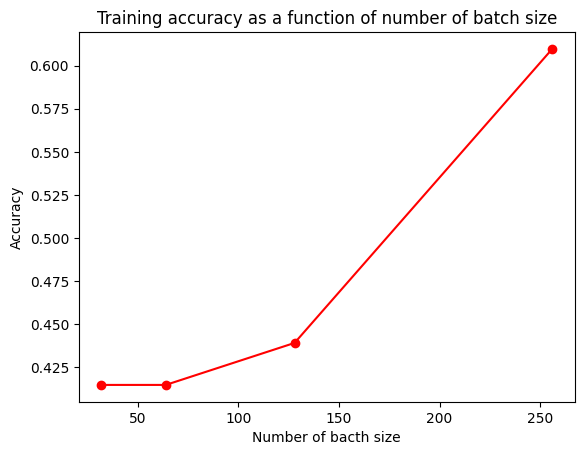

In [55]:
# Define input and output variables for training
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_en_batchpochs):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=n_batch, verbose=0)
    return history

# Train a series of models with varying numbers of batch size
n_batch_list = [32, 64, 128, 256]
loss_list = []
accuracy_list = []
for n_batch in n_batch_list:
    history = train_model(n_batch)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])


# Plot the loss as a function of number of epochs
plt.plot(n_batch_list, loss_list, 'bo-')
plt.xlabel('Number of batch size')
plt.ylabel('Loss')
plt.title('Training loss as a function of number of batch size')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_batch_list, accuracy_list, 'ro-')
plt.xlabel('Number of bacth size')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of batch size')


plt.show()

LEARNING RATE

c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inst

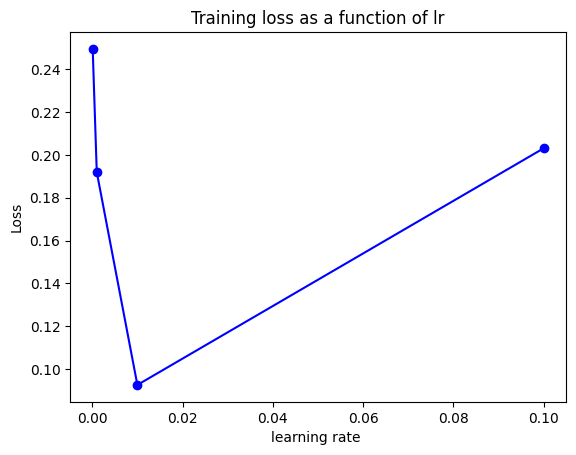

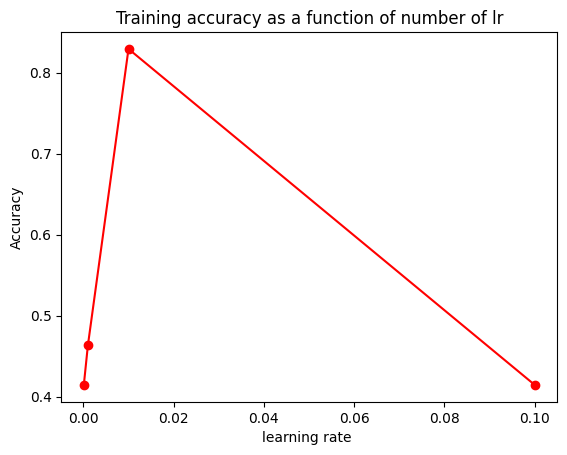

In [56]:
# Define input and output variables for training
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_lr):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=n_lr), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
    return history

# Train a series of models with varying numbers of epochs
n_lr_list = [0.0001, 0.001, 0.01, 0.1]
loss_list = []
accuracy_list = []
for n_lr in n_lr_list:
    history = train_model(n_lr)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])

# Plot the loss as a function of number of epochs
plt.plot(n_lr_list, loss_list, 'bo-')
plt.xlabel('learning rate ')
plt.ylabel('Loss')
plt.title('Training loss as a function of lr')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_lr_list, accuracy_list, 'ro-')
plt.xlabel('learning rate ')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of lr')


plt.show()

FINAL MODEL

In [57]:
# Define input and output variables for training
X = df_normalized_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [58]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
model.add(Dense(1, activation='linear'))
model.compile(loss=Huber(), optimizer=Adam(learning_rate= 0.001))

c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2260 
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2030
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1247
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1716
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1479
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1512
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1005
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1003
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0987
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0896
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0921
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0692
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0933
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0689
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0723
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms

In [60]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=1)
predictions = model.predict(X_test)
predicted_labels = np.round(predictions)
accuracy = accuracy_score(y_test, predicted_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0340
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Test Loss: 0.0339602492749691
Test Accuracy: 0.9090909090909091




(K-means)

In [61]:
from sklearn.cluster import KMeans

# Instantiate the KMeans class with desired number of clusters
kmeans = KMeans(n_init='auto',n_clusters=2, random_state=42,max_iter=300)

# Fit the model to the data
kmeans.fit(X_train)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centroids = kmeans.cluster_centers_


In [62]:
# Predict clusters for the testing data
y_pred = kmeans.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.45454545454545453
Precision: 0.625
Recall: 0.625
F1-score: 0.625
Confusion Matrix:
[[0 3]
 [3 5]]


(FULL DATASET)


In [63]:
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(Logistic Regression)

In [64]:
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Create a Logistic Regression object
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", conf_matrix)
# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9464285714285714
Precision: 1.0
Recall: 0.896551724137931
F1 Score: 0.9454545454545454
Confusion Matrix: [[27  0]
 [ 3 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.90      0.95        29

    accuracy                           0.95        56
   macro avg       0.95      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56



(Decision Tree)

In [65]:
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Create a Decision Tree object
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", conf_matrix)
# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9642857142857143
Precision: 0.9705882352941176
Recall: 0.9705882352941176
F1 Score: 0.9705882352941176
Confusion Matrix: [[21  1]
 [ 1 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.97      0.97      0.97        34

    accuracy                           0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.96      0.96      0.96        56



(Random Forests)

In [66]:
# Create a Random Forests object with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9642857142857143
Confusion Matrix:
[[22  0]
 [ 2 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.94      0.97        34

    accuracy                           0.96        56
   macro avg       0.96      0.97      0.96        56
weighted avg       0.97      0.96      0.96        56



(SVM)

In [67]:
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)


# Create an SVM object
svm = SVC(kernel='linear')

# Train the model on the training data
svm.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9821428571428571
Confusion Matrix:
[[24  0]
 [ 1 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.98        32

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



(Gradient Boosting Machines)

In [68]:
# Create a Gradient Boosting object
gbm = GradientBoostingClassifier()

# Train the model on the training data
gbm.fit(X_train, y_train)

# Predict on the testing data
y_pred = gbm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and f1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9821428571428571
Confusion Matrix:
[[24  0]
 [ 1 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.98        32

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3)) # Add a dropout layer with a rate of 0.5
model.add(Dense(1, activation='linear'))
model.compile(loss=Huber(), optimizer=Adam(learning_rate= 0.001), metrics=['accuracy']) # binary crossentropy


c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5661 - loss: 0.1631  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5424 - loss: 0.1453 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6306 - loss: 0.1272 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7622 - loss: 0.0939 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7633 - loss: 0.0808 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8026 - loss: 0.0704 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8655 - loss: 0.0564 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8689 - loss: 0.0590 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9053 - loss: 0.0533 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8806 - loss: 0.0549 


In [71]:

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=1)
predictions = model.predict(X_test)
predicted_labels = np.round(predictions)
accuracy = accuracy_score(y_test, predicted_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("\n")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9881 - loss: 0.0250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test Loss: [0.026427587494254112, 0.9821428656578064]
Test Accuracy: 0.9821428571428571




c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inst

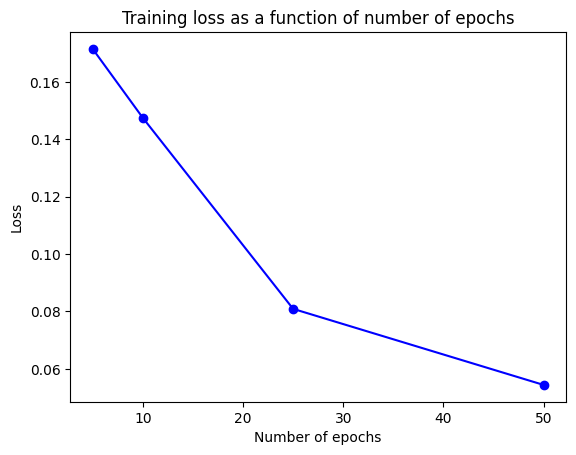

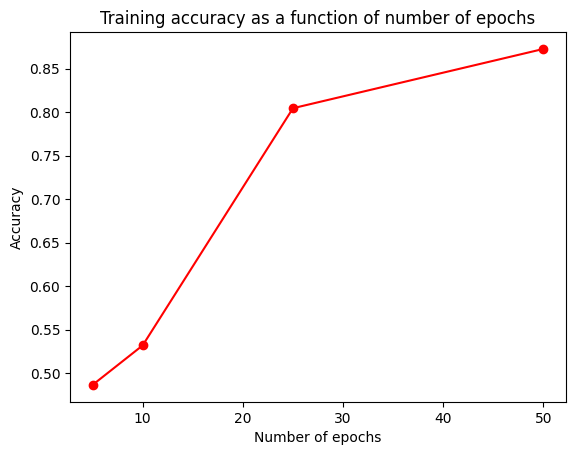

In [72]:
# Define input and output variables for training
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_epochs):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=128, verbose=0)
    return history

# Train a series of models with varying numbers of epochs
n_epochs_list = [5, 10, 25, 50]
loss_list = []
accuracy_list = []
for n_epochs in n_epochs_list:
    history = train_model(n_epochs)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])


# Plot the loss as a function of number of epochs
plt.plot(n_epochs_list, loss_list, 'bo-')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss as a function of number of epochs')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_epochs_list, accuracy_list, 'ro-')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of epochs')


plt.show()

c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inst

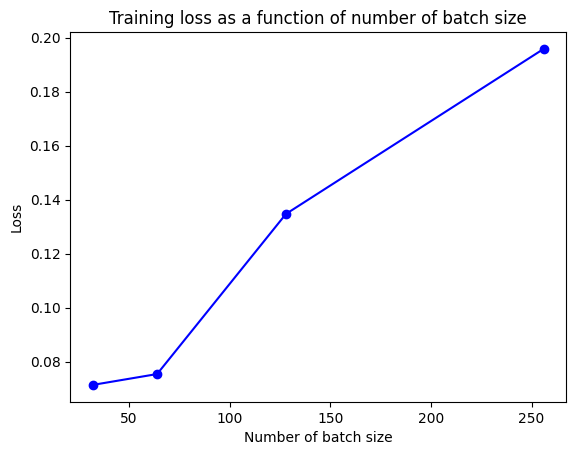

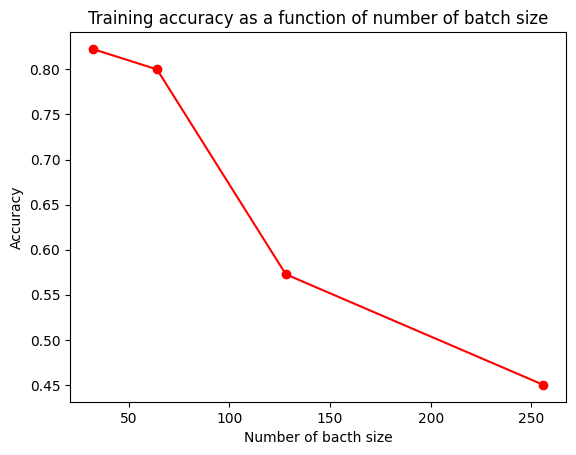

In [73]:
# Define input and output variables for training
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_en_batchpochs):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=n_batch, verbose=0)
    return history

# Train a series of models with varying numbers of batch size
n_batch_list = [32, 64, 128, 256]
loss_list = []
accuracy_list = []
for n_batch in n_batch_list:
    history = train_model(n_batch)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])


# Plot the loss as a function of number of epochs
plt.plot(n_batch_list, loss_list, 'bo-')
plt.xlabel('Number of batch size')
plt.ylabel('Loss')
plt.title('Training loss as a function of number of batch size')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_batch_list, accuracy_list, 'ro-')
plt.xlabel('Number of bacth size')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of batch size')


plt.show()

c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inst

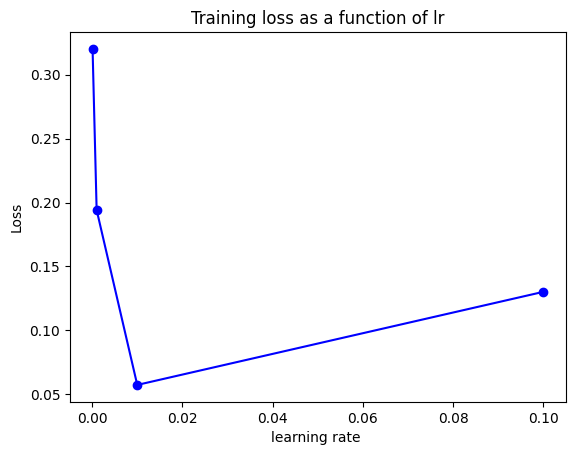

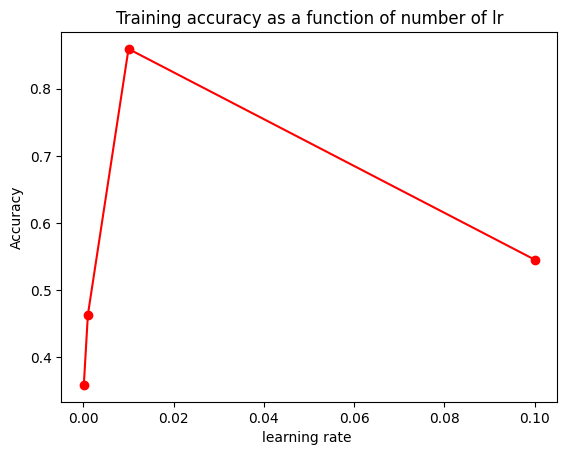

In [74]:
# Define input and output variables for training
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train a model and return its history
def train_model(n_lr):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
    model.add(Dense(1, activation='linear'))
    model.compile(loss=Huber(), optimizer=Adam(learning_rate=n_lr), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
    return history

# Train a series of models with varying numbers of epochs
n_lr_list = [0.0001, 0.001, 0.01, 0.1]
loss_list = []
accuracy_list = []
for n_lr in n_lr_list:
    history = train_model(n_lr)
    loss_list.append(history.history['loss'][-1])
    accuracy_list.append(history.history['accuracy'][-1])

# Plot the loss as a function of number of epochs
plt.plot(n_lr_list, loss_list, 'bo-')
plt.xlabel('learning rate ')
plt.ylabel('Loss')
plt.title('Training loss as a function of lr')
plt.show()

# Plot the accuracy as a function of number of epochs
plt.plot(n_lr_list, accuracy_list, 'ro-')
plt.xlabel('learning rate ')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of number of lr')


plt.show()

In [75]:
# Define input and output variables for training
X = df_normalized_full_corr_one_hot_encoding.iloc[:, 1:] # select all columns except the first one
y = df_normalized_full_corr_one_hot_encoding.iloc[:, 0] # select the first column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
model.add(Dense(1, activation='linear'))
model.compile(loss=Huber(), optimizer=Adam(learning_rate= 0.001))



c:\Users\Elliot\Desktop\diabetes-prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step - loss: 0.3804
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3417
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2865
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2554
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2187
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2034
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1815
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1718
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1416
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1447
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1616
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1627
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1457
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1339
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1368
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━

In [78]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=1)
predictions = model.predict(X_test)
predicted_labels = np.round(predictions)
accuracy = accuracy_score(y_test, predicted_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("\n")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0367
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000029B34AA2E80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test Loss: 0.03479214757680893
Test Accuracy: 0.9464285714285714


